In [1]:
### 2017 ####

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
file_to_load = ("papacream2.csv")

# Read Purchasing File and store into Pandas data frame
main = pd.read_csv(file_to_load)


main2017 = main.loc[main['AREA_NAME'].isin(['Sacramento--Roseville--Arden-Arcade, CA',
                                        'San Jose-Sunnyvale-Santa Clara, CA',
                                        'Seattle-Bellevue-Everett, WA Metropolitan Division',
                                        'Portland-Vancouver-Hillsboro, OR-WA',
                                        'Austin-Round Rock-San Marcos, TX',
                                        'San Antonio-New Braunfels, TX',
                                       ])]


main2017p = main2017.loc[main2017['OCC_GROUP'].isin(['detailed'])]


main2017_r = main2017p.loc[main['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122','15-1131','15-1132',	'15-1133',	'15-1134',	'15-1141',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',
'25-1064','25-1065','25-1066','25-1067','25-1069',  
    
])]


empl = main2017_r[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]

jobs = empl[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
inc = empl[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]

inc_nt = inc.dropna(how='any')
jobs_nt = jobs.dropna(how='any')

#------ Tech Info 

jobs_nt['TOT_EMP'] = jobs_nt.TOT_EMP.astype(float)
jobs_nt['JOBS_1000'] = jobs_nt.JOBS_1000.astype(float)
jobs_nt['YEAR'] = jobs_nt.YEAR.astype(float)
inc_nt['A_MEAN'] = inc_nt.A_MEAN.astype(float)
inc_nt['A_MEDIAN'] = inc_nt.A_MEDIAN.astype(float)


#new_jobs = jobs_nt.groupby(["YEAR","AREA_NAME"]).sum()
#new_inc = inc_nt.groupby(["YEAR","AREA_NAME"]).mean()

#------ Total Info

empl_t = main2017p[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]
jobs_t = empl_t[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000']]
inc_t = empl_t[['AREA_NAME','YEAR','A_MEAN','A_MEDIAN']]

inc_n = inc_t.dropna(how='any')
jobs_n = jobs_t.dropna(how='any')

jobs_n['TOT_EMP'] = jobs_n.TOT_EMP.astype(float)
jobs_n['JOBS_1000'] = jobs_n.JOBS_1000.astype(float)
inc_n['A_MEAN'] = inc_n.A_MEAN.astype(float)
inc_n['A_MEDIAN'] = inc_n.A_MEDIAN.astype(float)
#new_jobs_t = jobs_n.groupby(["YEAR","AREA_NAME"]).sum()
#new_inc_t = inc_n.groupby(["YEAR","AREA_NAME"]).mean()



In [2]:
# create pivots to consolidate information

tech_info = pd.pivot_table(inc_nt,index=["AREA_NAME","YEAR"])
total_info = pd.pivot_table(inc_n,index=["AREA_NAME","YEAR"])

In [3]:
tech_info_cleaned = tech_info.reset_index()

seattle = tech_info_cleaned.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland = tech_info_cleaned.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin = tech_info_cleaned.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio = tech_info_cleaned.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento = tech_info_cleaned.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose = tech_info_cleaned.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')
seattle

,AREA_NAME,YEAR,A_MEAN,A_MEDIAN
25,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2013,80758.866667,77340.400000
26,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2014,82515.673759,79264.255319
27,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2015,83092.464789,79674.436620
28,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2016,87272.653061,83114.693878
29,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2017,88076.275862,83198.827586


In [4]:
tech_info_cleaned_t = total_info.reset_index()

seattle_t = tech_info_cleaned_t.query('AREA_NAME == "Seattle-Bellevue-Everett, WA Metropolitan Division"')
portland_t = tech_info_cleaned_t.query('AREA_NAME == "Portland-Vancouver-Hillsboro, OR-WA"')
austin_t = tech_info_cleaned_t.query('AREA_NAME == "Austin-Round Rock-San Marcos, TX"')
san_antonio_t = tech_info_cleaned_t.query('AREA_NAME == "San Antonio-New Braunfels, TX"')
sacramento_t = tech_info_cleaned_t.query('AREA_NAME == "Sacramento--Roseville--Arden-Arcade, CA"')
san_jose_t = tech_info_cleaned_t.query('AREA_NAME == "San Jose-Sunnyvale-Santa Clara, CA"')
seattle_t

,AREA_NAME,YEAR,A_MEAN,A_MEDIAN
25,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2013,57913.323572,55334.011713
26,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2014,58655.877061,56040.239880
27,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2015,60033.712121,57294.439394
28,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2016,62652.083958,59577.451274
29,"Seattle-Bellevue-Everett, WA Metropolitan Divi...",2017,64195.258359,60722.933131


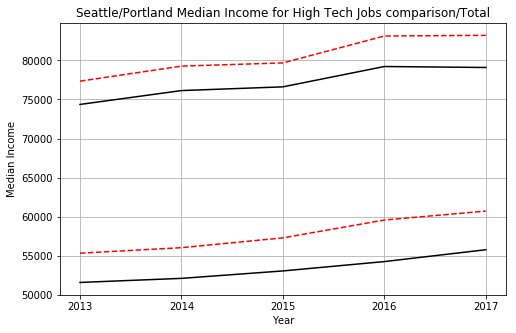

In [5]:
x_axis = [2013,2014,2015,2016,2017]

y_axis_s = seattle['A_MEDIAN']
y_axis_p = seattle_t['A_MEDIAN']
y_axis_po = portland['A_MEDIAN']
y_axis_ps = portland_t['A_MEDIAN']

plt.figure(1, figsize=(8,5))
plt.grid(True)

plt.xticks(x_axis)
plt.plot(x_axis, y_axis_s, 'r--')
plt.plot(x_axis, y_axis_p,'r--')
plt.plot(x_axis, y_axis_po, 'k')
plt.plot(x_axis, y_axis_ps, 'k')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Seattle/Portland Median Income for High Tech Jobs comparison/Total')


plt.show()

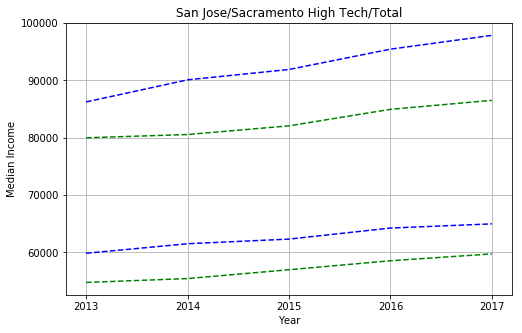

In [6]:
x_axis_s = [2013,2014,2015,2016,2017]

y_axis_sa = san_jose['A_MEDIAN']
y_axis_pa = san_jose_t['A_MEDIAN']
y_axis_poa = sacramento['A_MEDIAN']
y_axis_psa = sacramento_t['A_MEDIAN']

plt.figure(2, figsize=(8,5))
plt.grid(True)
#plt.setp(lines, color='r', linewidth=5.0)


plt.xticks(x_axis_s)
plt.plot(x_axis_s, y_axis_sa, 'b--')
plt.plot(x_axis_s, y_axis_pa,'b--')
plt.plot(x_axis_s, y_axis_poa,'g--')
plt.plot(x_axis_s, y_axis_psa,'g--')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('San Jose/Sacramento High Tech/Total')


plt.show()

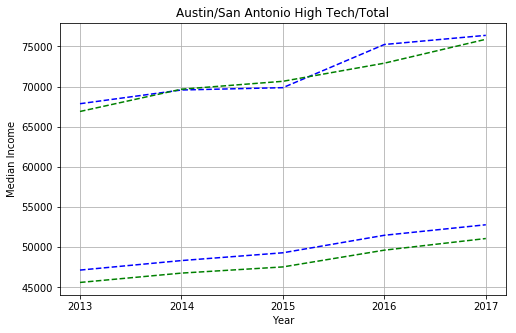

In [7]:
x_axis_r = [2013,2014,2015,2016,2017]

y_axis_sr = austin['A_MEDIAN']
y_axis_pr = austin_t['A_MEDIAN']
y_axis_por = san_antonio['A_MEDIAN']
y_axis_psr = san_antonio_t['A_MEDIAN']

plt.figure(3, figsize=(8,5))
plt.grid(True)

plt.xticks(x_axis_s)
plt.plot(x_axis_r, y_axis_sr, 'b--')
plt.plot(x_axis_r, y_axis_pr,'b--')
plt.plot(x_axis_r, y_axis_por,'g--')
plt.plot(x_axis_r, y_axis_psr,'g--')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Austin/San Antonio High Tech/Total')


plt.show()

Text(0, 0.5, 'Wind Speed (Kph)')

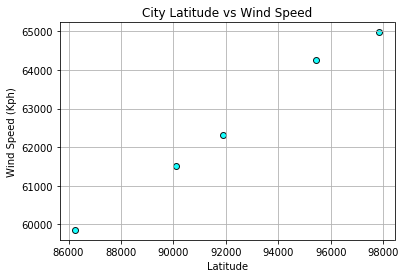

In [8]:
fig, ax = plt.subplots()

x_axis = y_axis_sa
y_axis = y_axis_pa

plt.scatter(x_axis , y_axis, marker="o", facecolor="Aqua", edgecolors="black", alpha=0.90)

# Incorporate the other graph properties
ax.grid(True)

plt.title(f"City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Kph)")

# Save Figure




# BELOW HERE IS THE NEW


In [90]:


capi = main.loc[main['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122','15-1131','15-1132',	'15-1133',	'15-1134',	'15-1141',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',
'25-1064','25-1065','25-1066','25-1067','25-1069',  
    
])]

capi2 = capi.loc[capi['OCC_GROUP'].isin(['detailed'])]

capi3 = capi2[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]

papat = capi3.groupby(["AREA_NAME","YEAR"]).sum()
papat2 = capi3.groupby(["AREA_NAME","YEAR"]).mean()

vv = papat.query('YEAR == 2017').reset_index()
vv2 =papat2.query('YEAR == 2017').reset_index()

d = pd.DataFrame()

d['TOT_EMP'] = vv['TOT_EMP']
d['JOBS_1000'] = vv['JOBS_1000']
d['A_MEDIAN'] = vv2['A_MEDIAN']
d['A_MEAN'] = vv2['A_MEAN']


In [91]:
d

,TOT_EMP,JOBS_1000,A_MEDIAN,A_MEAN
0,5770.0,89.458,69249.772727,79209.565217
1,3860.0,87.315,44285.909091,45610.000000
2,41070.0,125.306,73984.845361,84031.764706
3,4090.0,66.982,68550.909091,82571.142857
4,2120.0,49.709,69884.814815,83108.620690
5,65290.0,145.620,76890.163934,84269.919355
6,48600.0,127.539,75182.500000,83780.540541
7,5730.0,94.963,57543.870968,70289.393939
8,41840.0,116.565,77698.461538,85555.471698
9,4950.0,86.666,65496.944444,72469.459459


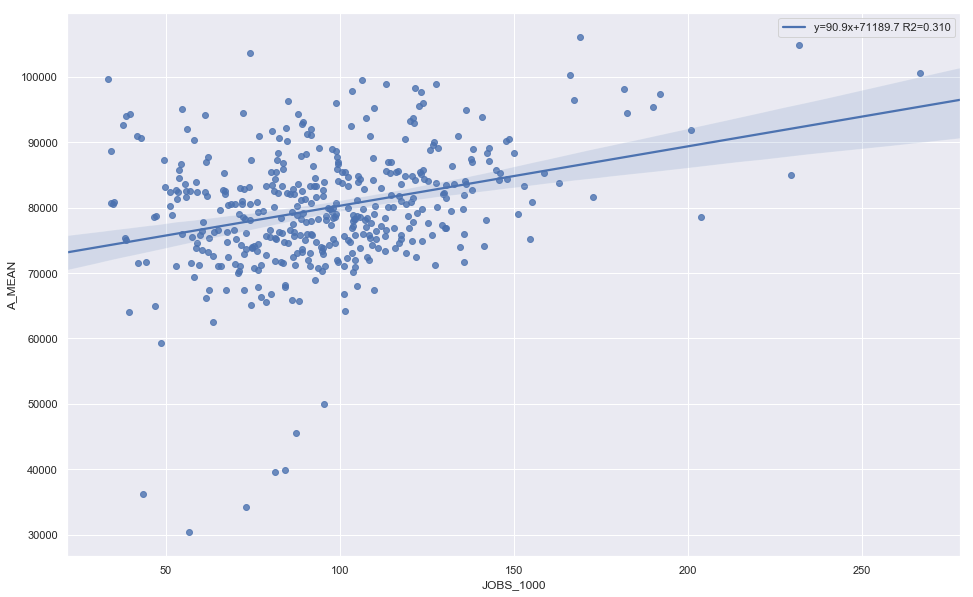

In [104]:

import seaborn as sns; sns.set(color_codes=True)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



slope, intercept, r_value, p_value, std_err = stats.linregress(d['JOBS_1000'],d['A_MEAN'])

ax = sns.regplot(x="JOBS_1000", y="A_MEAN", data=d, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f} R2={2:.3f}".format(slope,intercept,r_value)})
line_kws={r_value}

fig = plt.gcf()
fig.set_size_inches( 16, 10)

#g = sns.lmplot(x='JOBS_1000', y='A_MEAN' , data=vv) #, data=tips  

ax.legend()

plt.show()




In [96]:

mami = main.loc[~main['OCC_CODE'].isin(['15-3021','11-9121','15-1111','15-1121','15-1122','15-1131','15-1132',	'15-1133',	'15-1134',	'15-1141',
'15-1142','15-1143','15-1151','15-1152','15-1199','15-2011','15-2021','15-2031','15-2041','15-2091',
'15-2099','17-1021','17-1022','17-2011','17-2021','17-2031','17-2041','17-2051','17-2061','17-2071',
'17-2072','17-2081','17-2111','17-2112','17-2121','17-2131','17-2141','17-2151','17-2161','17-2171',
'17-2199','17-3012','17-3013','17-3019','17-3021','17-3022','17-3023','17-3024','17-3025','17-3026',
'17-3027','17-3029','17-3031','19-1011','19-1012','19-1013','19-1021','19-1022','19-1023','19-1029',
'19-1031','19-1032','19-1041','19-1042','19-1099','19-2011','19-2012','19-2021','19-2031','19-2032',
'19-2041','19-2042','19-2043','19-2099','19-4011','19-4021','19-4031','19-4041','19-4051','19-4091',
'19-4092','19-4093','25-1021','25-1022','25-1032','25-1041','25-1042','25-1043','25-1051','25-1052',
'25-1053','25-1054','41-4011','41-9031','11-9041','17-3011','19-4099','11-9111','25-1071','25-1072',
'29-1011','29-1021','29-1022','29-1023','29-1024','29-1029','29-1031','29-1041','29-1051','29-1061',
'29-1062','29-1063','29-1064','29-1065','29-1066','29-1067','29-1069','29-1071','29-1081','29-1122',
'29-1123','29-1124','29-1125','29-1126','29-1127','29-1128','29-1129','29-1131','29-1141','29-1151',
'29-1161','29-1171','29-1181','29-1199','29-2011','29-2012','29-2021','29-2031','29-2032','29-2033',
'29-2034','29-2035 ','29-2041','29-2051','29-2052','29-2053','29-2054','29-2055','29-2056','29-2057',
'29-2061','29-2071','29-2081','29-2091','29-2092','29-2099','29-9011','29-9012','29-9091','29-9092',
'29-9099','17-1011','17-1012','25-1031','19-3011','19-3022','19-3031','19-3032','19-3039','19-3041',
'19-3051','19-3091','19-3092','19-3094','19-3099','19-4061','25-1061','25-1062','25-1063','25-1064',
'25-1064','25-1065','25-1066','25-1067','25-1069',  
    
])]

pez = mami.loc[mami['OCC_GROUP'].isin(['detailed'])]
pez2 = pez[['AREA_NAME','YEAR','TOT_EMP','JOBS_1000','A_MEAN','A_MEDIAN']]

cebolla = pez2.groupby(["AREA_NAME","YEAR"]).sum()
cebolla2 = pez2.groupby(["AREA_NAME","YEAR"]).mean()

ooo = cebolla.query('YEAR == 2017').reset_index()
ooo2 = cebolla2.query('YEAR == 2017').reset_index()


f = pd.DataFrame()

f['TOT_EMP'] = ooo['TOT_EMP']
f['JOBS_1000'] = ooo['JOBS_1000']
f['A_MEDIAN'] = ooo2['A_MEDIAN']
f['A_MEAN'] = ooo2['A_MEAN']





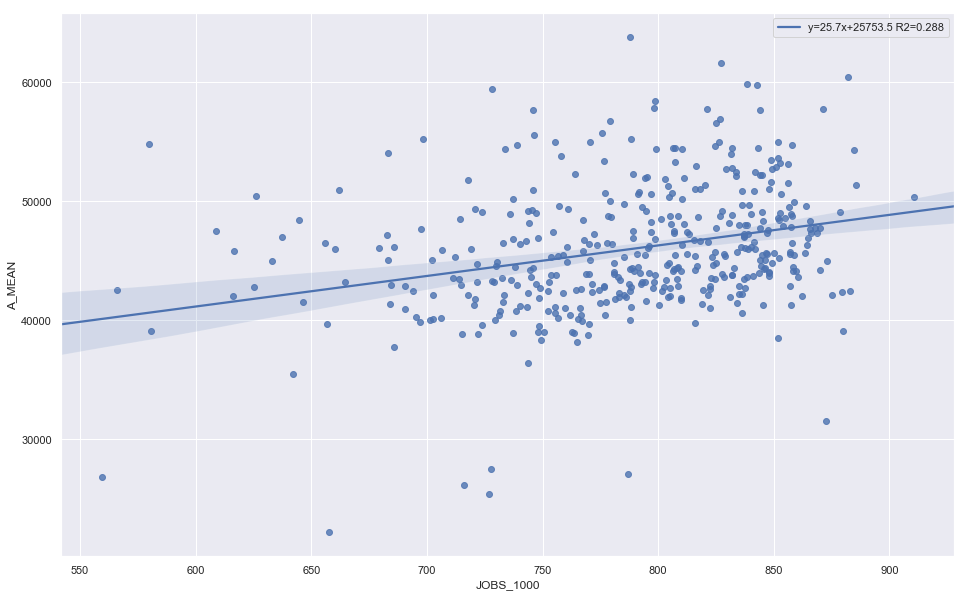

In [110]:

slope, intercept, r_value, p_value, std_err = stats.linregress(f['JOBS_1000'],f['A_MEAN'])

ax = sns.regplot(x="JOBS_1000", y="A_MEAN", data=f, color='b', 

line_kws={'label':"y={0:.1f}x+{1:.1f} R2={2:.3f}".format(slope,intercept,r_value)})


fig2 = plt.gcf()
fig2.set_size_inches( 16, 10)

#g = sns.lmplot(x='JOBS_1000', y='A_MEAN' , data=vv) #, data=tips  

ax.legend()

plt.show()